In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
# Load dataset (assuming "student-mat.csv" is downloaded from UCI)
df = pd.read_csv("student-mat.csv", sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
# Load dataset (assuming "student-mat.csv" is downloaded from UCI)
df = pd.read_csv("student-mat.csv", sep=";")

# Create Pass/Fail target
df["pass"] = df["G3"] >= 10
y = df["pass"]
# Drop grades (G1, G2, G3) to avoid leakage
X = df.drop(["G1", "G2", "G3", "pass"], axis=1)

# Convert categorical to numeric (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Train decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

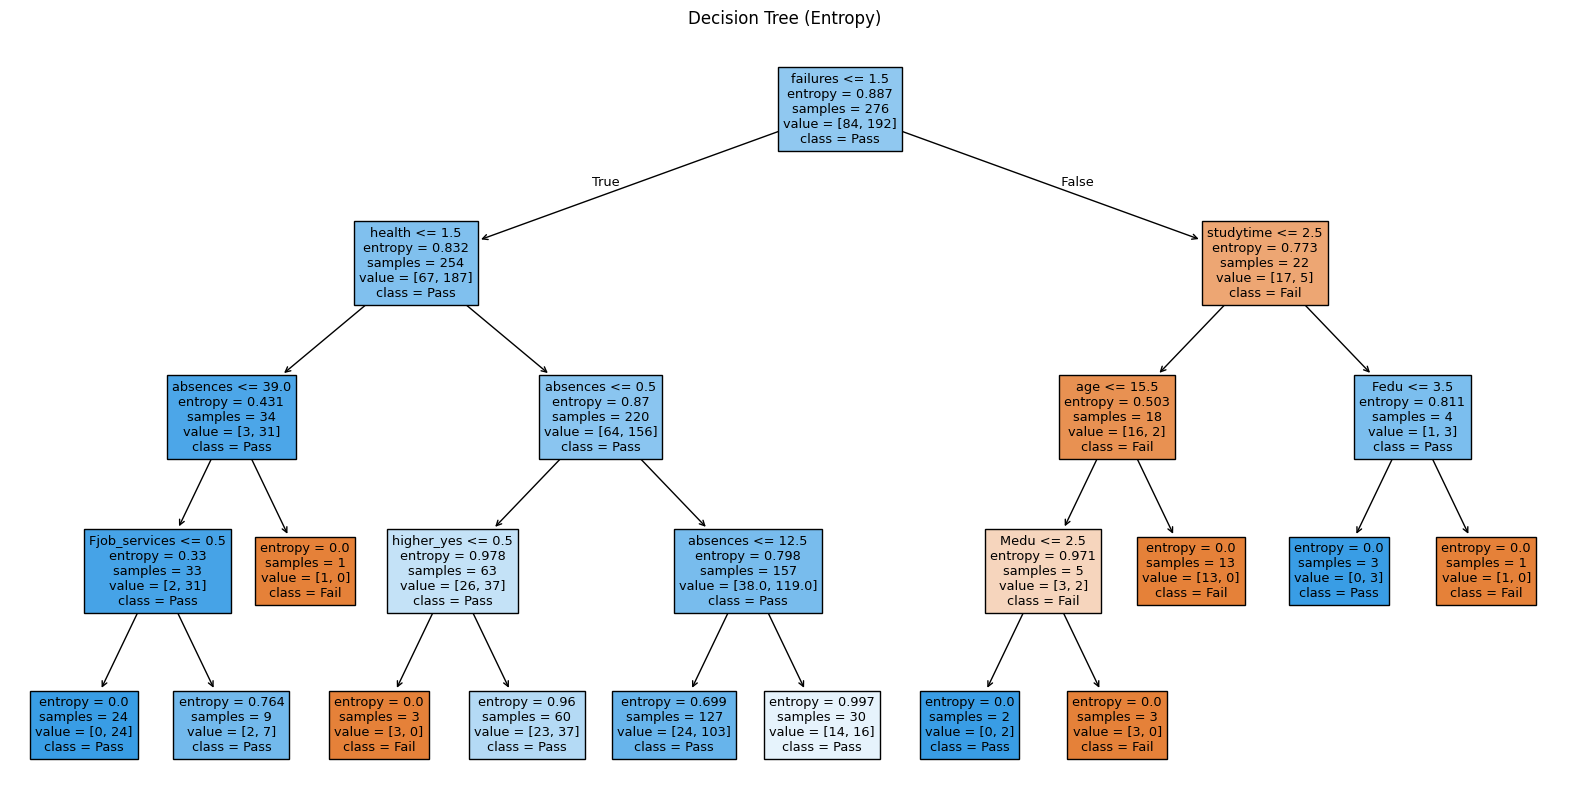

Accuracy: 0.6722689075630253


In [6]:
clf = DecisionTreeClassifier(max_depth=4, criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

# Visualize tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["Fail","Pass"], filled=True)
plt.title("Decision Tree (Entropy)")
plt.show()

# Accuracy
print("Accuracy:", clf.score(X_test, y_test))


Accuracy (Entropy): 0.6722689075630253
Accuracy (Gini): 0.6554621848739496


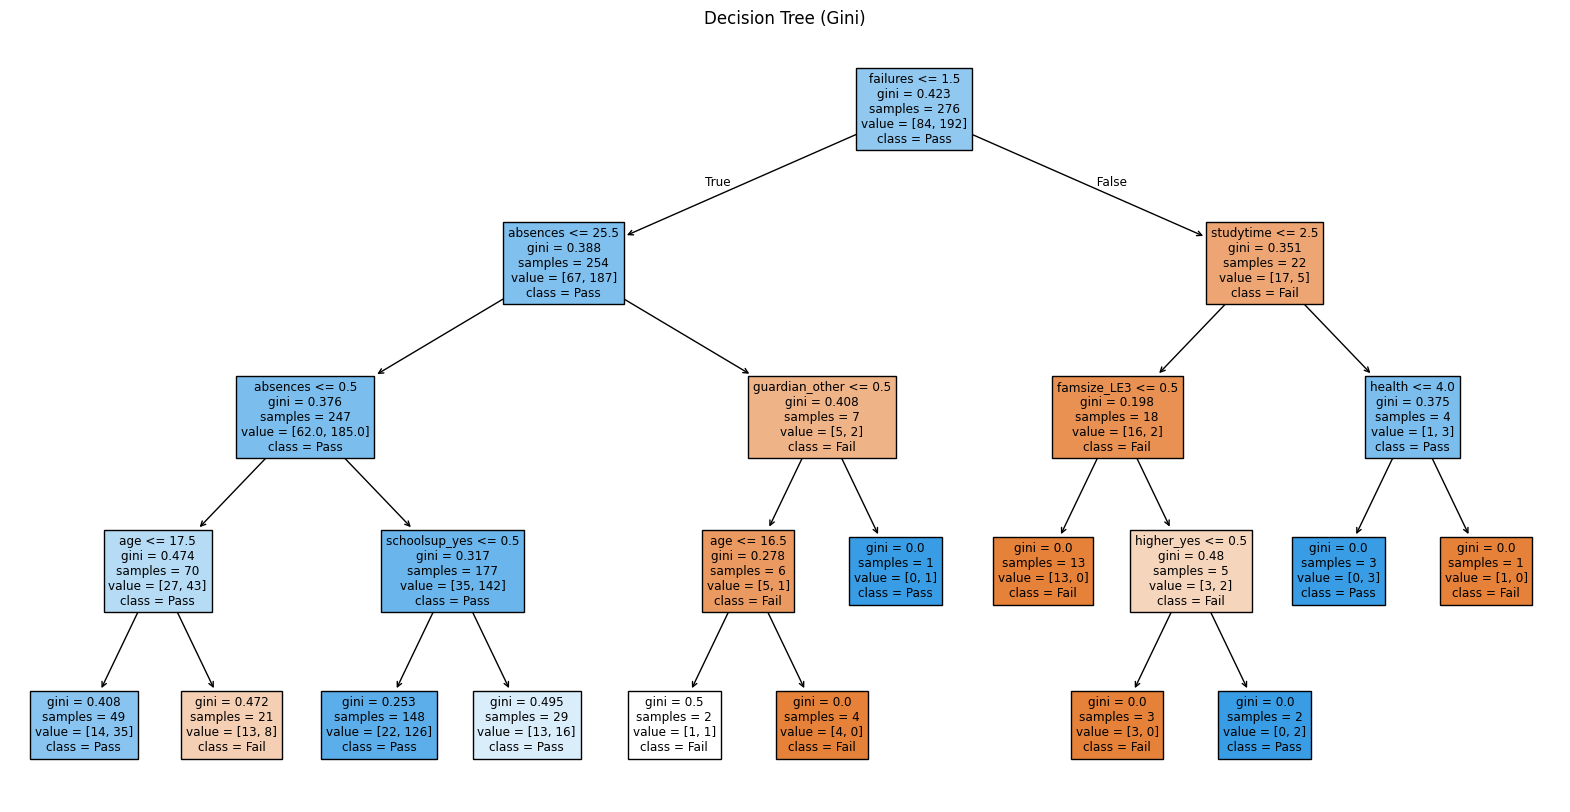

In [7]:
# Train decision tree with Gini criterion
clf_gini = DecisionTreeClassifier(max_depth=4, criterion="gini", random_state=42)
clf_gini.fit(X_train, y_train)

# Accuracy comparison
acc_entropy = clf.score(X_test, y_test)
acc_gini = clf_gini.score(X_test, y_test)
print(f"Accuracy (Entropy): {acc_entropy}")
print(f"Accuracy (Gini): {acc_gini}")

# Plot Gini tree
plt.figure(figsize=(20,10))
plot_tree(clf_gini, feature_names=X.columns, class_names=["Fail","Pass"], filled=True)
plt.title("Decision Tree (Gini)")
plt.show()



In [8]:
# Drop only "pass" column, keep G1, G2, G3
X_full = df.drop(["pass"], axis=1)

# One-hot encode categorical variables
X_full = pd.get_dummies(X_full, drop_first=True)

# Split data
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size=0.3, random_state=42)
# Train decision tree with leaked features
clf_full = DecisionTreeClassifier(max_depth=4, criterion="entropy", random_state=42)
clf_full.fit(X_train_full, y_train_full)

# Evaluate accuracy
acc_full = clf_full.score(X_test_full, y_test_full)
print(f"Accuracy without data leakage (G1, G2, G3 included): {acc_full:.4f}")

Accuracy without data leakage (G1, G2, G3 included): 1.0000


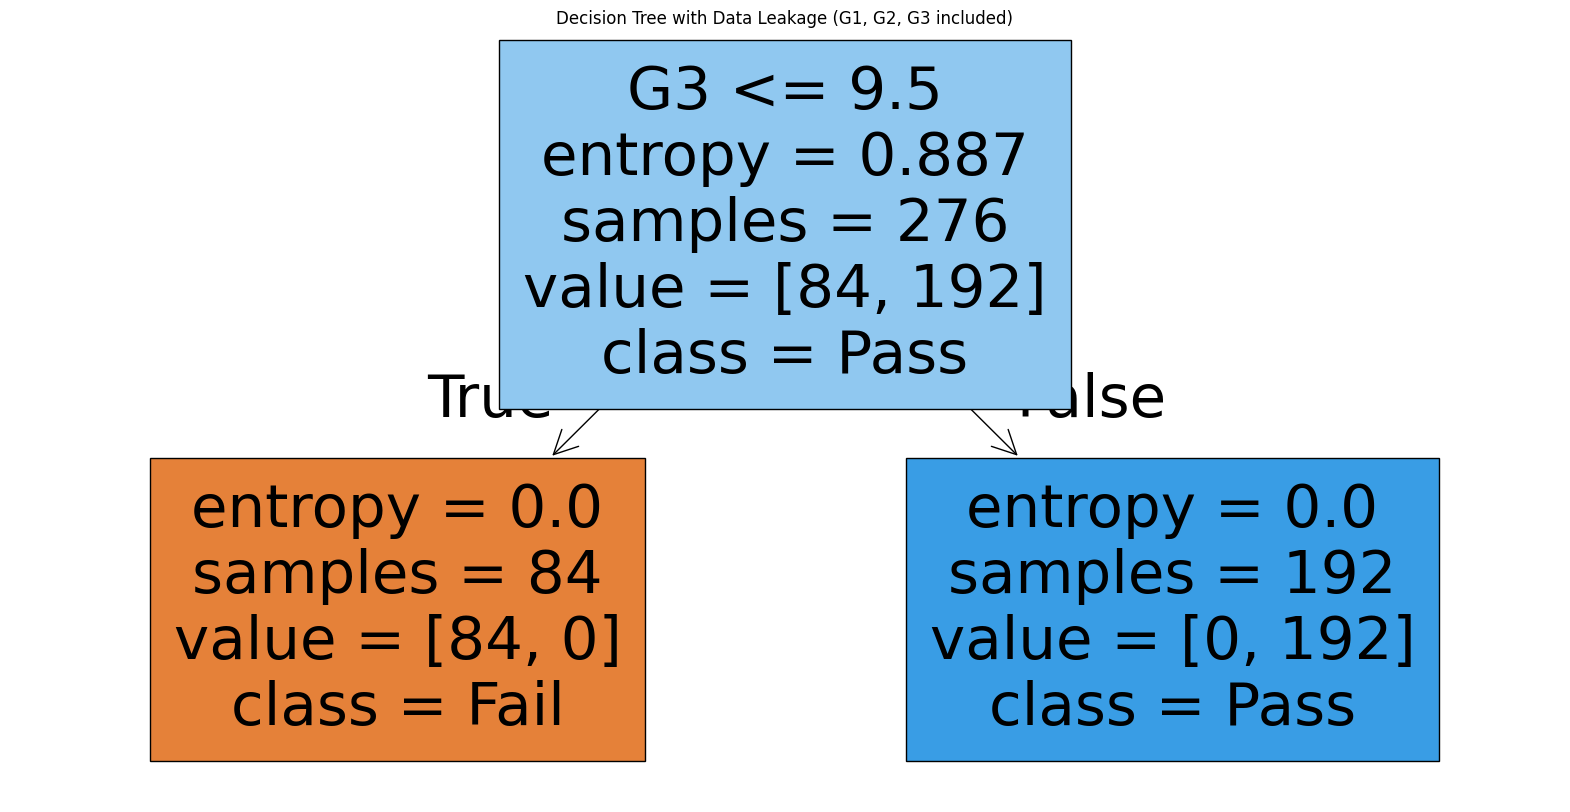

In [9]:
# plot decision tree
plt.figure(figsize=(20,10))
plot_tree(clf_full, feature_names=X_full.columns, class_names=["Fail","Pass"], filled=True)
plt.title("Decision Tree with Data Leakage (G1, G2, G3 included)")  
plt.show()

# Discussion:
"Including G1, G2, G3 (grades) in the features causes data leakage, because these grades are highly correlated with the target 'pass'. This results in artificially high accuracy, but the model will not generalize well to new data where such information is not available. Always avoid using features that directly reveal the target."